In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# STEP 1: MOUNT GOOGLE DRIVE
print("Step 1: Mounting Google Drive...")
from google.colab import drive
drive.mount('/content/drive')
print("✓ Drive mounted successfully!\n")

# STEP 3: LOAD YOUR DATASET
print("Step 3: Loading dataset...")
# REPLACE THIS PATH WITH YOUR ACTUAL FILE PATH
file_path = '/content/drive/MyDrive/t20i_Matches_Data_final.csv'  # CHANGE THIS!

# For CSV files:
df = pd.read_csv(file_path)
df.head()

Step 1: Mounting Google Drive...
Mounted at /content/drive
✓ Drive mounted successfully!

Step 3: Loading dataset...


,Team1 Name,Team1 Runs Scored,Team1 Wickets Fell,Team2 Name,Team2 Runs Scored,Team2 Wickets Fell,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Toss Winner,Match Winner,Toss Winner Choice_bat,Toss Winner Choice_bowl,Toss Winner Choice_match called off
0,41,0.230769,1.0,2,0.278431,0.1,118,111,1,41,2,True,False,False
1,26,0.612179,0.8,66,0.545098,0.8,83,40,41,26,26,True,False,False
2,81,0.336538,0.8,65,0.415686,0.5,32,15,28,65,65,False,True,False
3,50,0.333333,0.9,81,0.403922,0.1,32,15,28,50,81,True,False,False
4,104,0.333333,0.8,90,0.403922,0.5,113,92,8,90,90,False,True,False


In [4]:
#Encode Categorical Columns
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

In [5]:
#Prepare Features & Target
X = df.drop(columns=['Match Winner'])
y = df['Match Winner']

In [6]:
#Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
#Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [9]:
#Evaluate
y_pred = gbc.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nGradient Boosting Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Gradient Boosting Accuracy: 0.6590

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.25      1.00      0.40         1
           2       0.86      0.75      0.80        24
           3       0.33      0.29      0.31         7
           4       0.00      0.00      0.00         1
           5       1.00      0.71      0.83         7
           6       0.88      0.82      0.85        17
           7       0.25      0.20      0.22         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         5
          10       0.50      0.33      0.40         3
          11       1.00      1.00      1.00         3
          13       0.33      0.20      0.25         5
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       1.00      0.82      0.90        11
          17       1

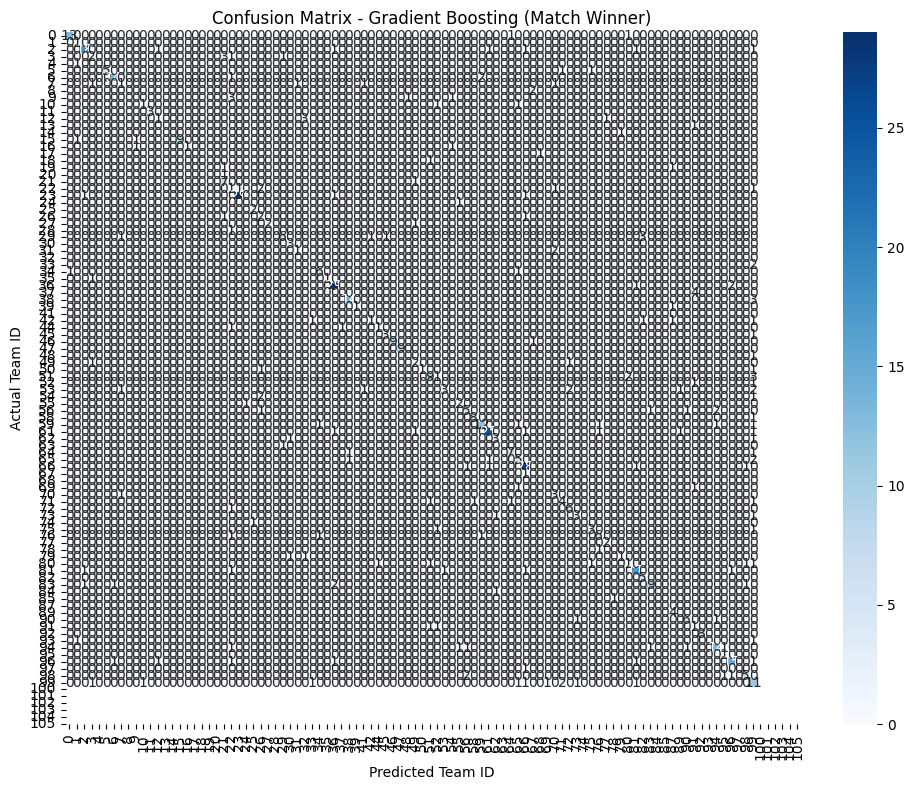

In [10]:
#Visualize Confusion Matrix
plt.figure(figsize=(10,8))
unique_classes = sorted(y.unique())
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=unique_classes,
    yticklabels=unique_classes
)
plt.title("Confusion Matrix - Gradient Boosting (Match Winner)")
plt.xlabel("Predicted Team ID")
plt.ylabel("Actual Team ID")
plt.tight_layout()
plt.savefig("gradient_boosting_confusion_matrix.png")